In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
plt.style.use('seaborn-deep')
# pd.set_option('display.max_colwidth', None)  # отображать весь текст в ячейках

In [ ]:
! gdown 1XhUtIB75xky2MSCJVPCt6eNtsSQCKEU0  # eda
! gdown 10MH8q4lZ1RVCgLGDwG_ijO_jzSLVefC0  # 25 самых частых навыков со средней зарплатой
! gdown 1XLMj0Km6yQU9hcQ3EplFgDqJq9J8m0Ww  # самые "дорогоие" навыки из вакансий

Downloading...
From: https://drive.google.com/uc?id=1XhUtIB75xky2MSCJVPCt6eNtsSQCKEU0
To: /content/eda.xlsx
100% 3.28M/3.28M [00:00<00:00, 139MB/s]
Downloading...
From: https://drive.google.com/uc?id=10MH8q4lZ1RVCgLGDwG_ijO_jzSLVefC0
To: /content/stat_topSkill_meanSalary.xlsx
100% 11.8k/11.8k [00:00<00:00, 12.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XLMj0Km6yQU9hcQ3EplFgDqJq9J8m0Ww
To: /content/stat_top100_salary_by_skill.xlsx
100% 11.0k/11.0k [00:00<00:00, 10.0MB/s]


In [ ]:
df = pd.read_excel('/content/eda.xlsx')
df25 = pd.read_excel('/content/stat_topSkill_meanSalary.xlsx')
df100 = pd.read_excel('/content/stat_top100_salary_by_skill.xlsx')

In [ ]:
df.rename(columns={'key_skills_edited': 'key_skills'}, inplace=True)  # косметическое переименование столбца
df100.rename(columns={'key_skills_edited': 'top_skill'}, inplace=True)  # косметическое переименование столбца

__________________________

# 1. Структурирование данных

Структурирование данных было выполнено в разделе EDA. В данный блокнот были загружены обработанные таблицы.

In [ ]:
df.head()

,id,name,salary,employer,experience,region,key_skills
0,49059633.0,Младший специалист ручного тестирования,NaN,Яндекс,Нет опыта,Астраханская область,[]
1,54653519.0,Тестировщик.Net,33186.0,МФК Саммит,От 1 года до 3 лет,Астраханская область,"['Git', 'SQL', 'Тестирование', 'C#', 'API']"
2,55116066.0,Пентестер,NaN,SearchInform,От 3 до 6 лет,Астраханская область,"['SQL', 'Linux', 'Информационная безопасность'..."
3,54031261.0,Ведущий Специалист по информационным технологиям,23008.0,Почта России,Нет опыта,Астраханская область,"['Пользователь ПК', 'Работа в команде', '1С: П..."
4,55243040.0,Специалист по защите информации,20000.0,ГБПОУ АО Астраханский музыкальный колледж имен...,Нет опыта,Астраханская область,"['MS Dos', 'Диагностика ПК', 'Компьютер', 'Раб..."


In [ ]:
df25.head()

,Skill,Freq,MeanSalary
0,SQL,6268,128469.433709
1,Linux,4855,119929.442438
2,Git,4522,153280.553104
3,Английский язык,3905,130258.275727
4,Работа в команде,3438,73895.721159


In [ ]:
df100.head()

,top_skill,salary
0,Мобильное приложение,898230.0
1,CI CD,750000.0
2,Cloud,750000.0
3,Business Process Management,600000.0
4,Strategic Planning,600000.0


______________________________

# 2. Анализ типов данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49678 entries, 0 to 49677
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          49678 non-null  float64
 1   name        49678 non-null  object 
 2   salary      22477 non-null  float64
 3   employer    49613 non-null  object 
 4   experience  49678 non-null  object 
 5   region      49678 non-null  object 
 6   key_skills  49678 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.7+ MB


__Типы данных в датасете df:__
  1. id - идентификатор вакансии на HH, при анализе не используется, нужен на случай, когда потребуется обратиться к определённой вакансии прямо на сайте, _порядковый тип_
  2. name - наименование вакансии, _категориальный тип_
  3. salary - средняя зарплата по вакансии, _количественный тип_
  4. employer - работодатель, _категориальный тип_
  5. experience - опыт работы, _категориальный тип_
  6. region - регион вакансии, _категориальный тип_
  7. key_skills - список ключевых навыков и способностей, _категориальный тип_

In [ ]:
df25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Skill       25 non-null     object 
 1   Freq        25 non-null     int64  
 2   MeanSalary  25 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 728.0+ bytes


**Типы данных в датасете df25:**

1. Skill - наименование навыка, категориальный тип
2. Freq - частота упоминания навыка, количественный тип
3. MeanSalary  - средняя зарплата по навыку, количественный тип


In [ ]:
df100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   top_skill  100 non-null    object 
 1   salary     100 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


**Типы данных в датасете df100:**

1. top_skill - наименование высокооплачиваемого навыка, категориальный тип
2. salary - средняя зарплата по навыку, количественный тип

# 3. Визуализация данных

Гистограмма распределения зарплаты по количеству объявлений:

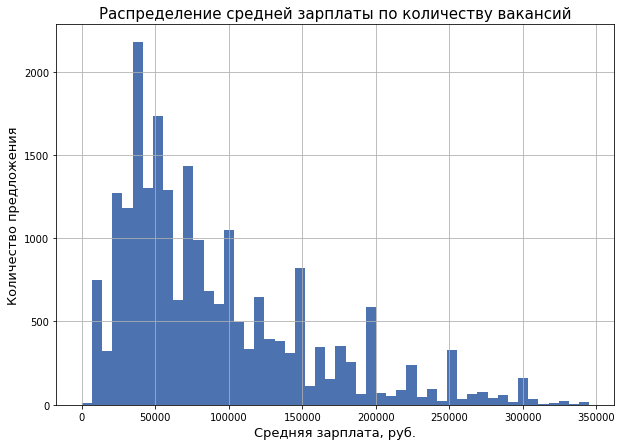

In [ ]:
plt.figure(figsize=(10,7))
df['salary'][df['salary'] < df['salary'].quantile(0.99)].hist(bins=50)  # убираю 1% максимальных зарплат (выбросы) для большей наглядности графика
plt.title('Распределение средней зарплаты по количеству вакансий', fontsize=15)
plt.xlabel('Средняя зарплата, руб.', fontsize=13)
plt.ylabel('Количество предложения', fontsize=13)
plt.show()

Столбчатая диаграмма:

In [ ]:
vacancies_names = df['name'].value_counts()[:20]  # 20 самых частых вакансий

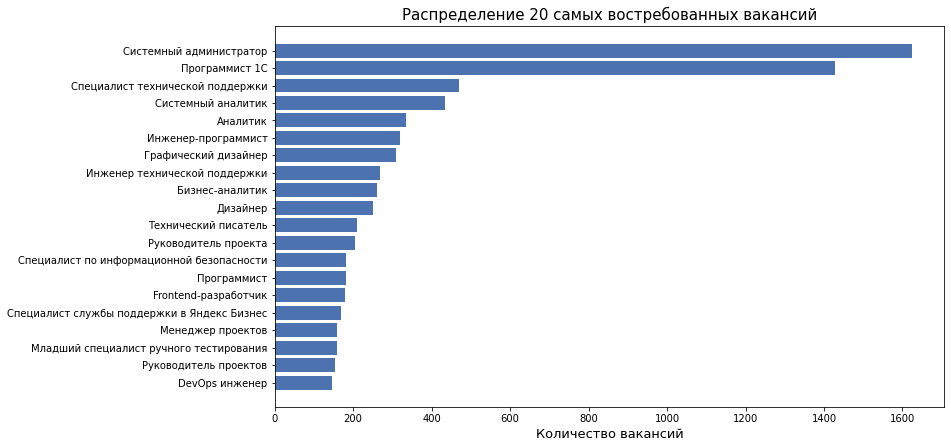

In [ ]:
plt.figure(figsize = (12, 7))
plt.barh(vacancies_names.index, vacancies_names)
plt.gca().invert_yaxis()
plt.xlabel('Количество вакансий', fontsize=13)
plt.title('Распределение 20 самых востребованных вакансий', fontsize=15)
plt.show()

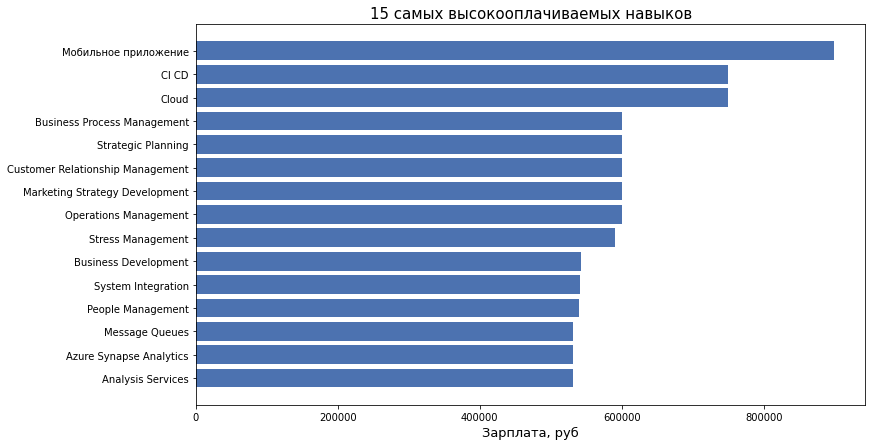

In [ ]:
plt.figure(figsize = (12, 7))
plt.barh(df100['top_skill'][:15], df100['salary'][:15])
plt.gca().invert_yaxis()
plt.xlabel('Зарплата, руб', fontsize=13)
plt.title('15 самых высокооплачиваемых навыков', fontsize=15)
plt.show()

Диаграмма рассеивания:

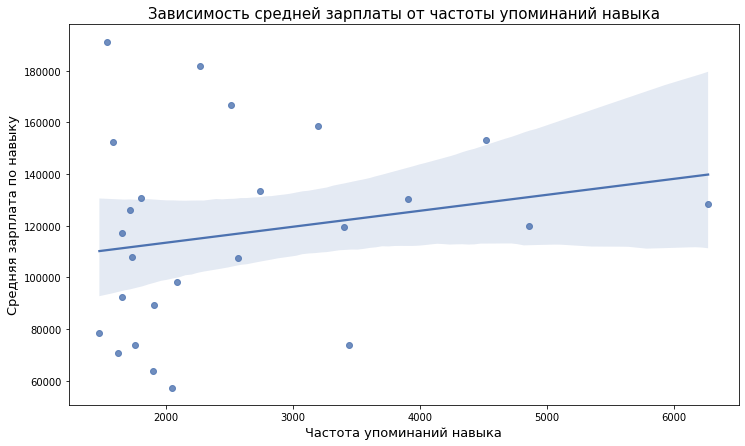

In [ ]:
plt.figure(figsize = (12, 7))
x, y = df25['Freq'], df25['MeanSalary']
sns.regplot(x, y)
plt.xlabel('Частота упоминаний навыка', fontsize=13)
plt.ylabel('Средняя зарплата по навыку', fontsize=13)
plt.title('Зависимость средней зарплаты от частоты упоминаний навыка', fontsize=15)
plt.show()

Круговая диаграмма:

In [ ]:
top5_employers = df['employer'].value_counts()[:5]  # выбираю ТОП-5 работодателей в сфере IT

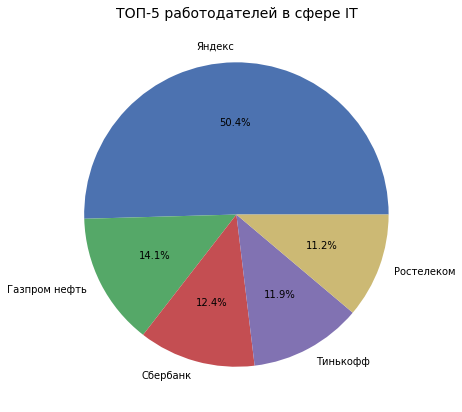

In [ ]:
plt.figure(figsize = (7, 7))
plt.pie(top5_employers, labels=top5_employers.index, autopct='%1.1f%%')
plt.title('ТОП-5 работодателей в сфере IT', fontsize=14)
plt.show()

_______________________________________

# 4. Гипотеза о виде распределения

__Критерий Шапиро-Уилка__

Гипотеза Н0: данные о средней зарплате не противоречат нормальному распределению

In [ ]:
stats.shapiro(df['salary'].dropna())

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8289628624916077, pvalue=0.0)

p-value = 0.0, нулевая гипотеза H0 о нормальности распределения отвергается, выборка распределена не нормально

In [ ]:
stats.shapiro(df100['salary'])  # проверка на 100 значениях из выборки показывает такой же результат p-value

ShapiroResult(statistic=0.7334569692611694, pvalue=3.497059846563344e-12)

**Тест д'Агостино**

Проверяем итоговые показатели эксцесса и ассиметрии:

In [ ]:
stats.normaltest(df['salary'].dropna())

NormaltestResult(statistic=9306.352013651045, pvalue=0.0)

Данный тест подтверждает гипотезу о ненормальном распределении данных.

___________________________________________________

# 5. Оценить связь между показателями

Гипотеза Н0: статистически значимые отличия в группах (опыт работы) отсутствуют

Сначала удаляю выбросы: 2,5% снизу и 5% сверху.

In [ ]:
filter = (df['salary'] >= df['salary'].quantile(0.025)) & (df['salary'] < df['salary'].quantile(0.95))
df = df[filter]

Строю боксплоты для визуальной оценки зависимости зарплаты от опыта работы.

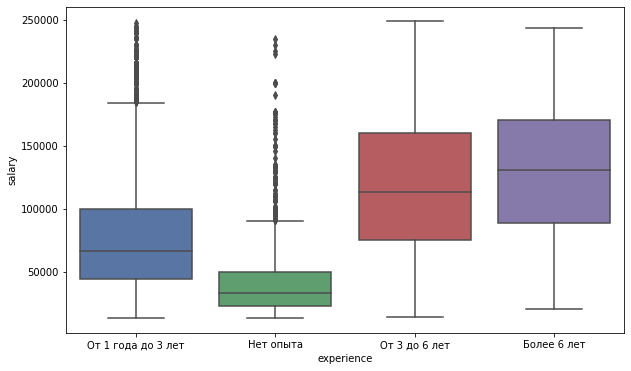

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='experience', y='salary', data=df)

In [ ]:
df.experience.value_counts()

От 1 года до 3 лет    11449
От 3 до 6 лет          5210
Нет опыта              3970
Более 6 лет             426
Name: experience, dtype: int64

Делю 4 показателя опыта на 2 группы по разделу 3-х лет.

In [ ]:
filter1 = (df['experience'] == 'Нет опыта') | (df['experience'] == 'От 1 года до 3 лет')
filter2 = (df['experience'] == 'От 3 до 6 лет') | (df['experience'] == 'Более 6 лет')
df1 = df[filter1]
df2 = df[filter2]

In [ ]:
stats.mannwhitneyu(df1['salary'], df2['salary'])

MannwhitneyuResult(statistic=19318470.5, pvalue=0.0)

Критерий Манна-Уитни подверждает, что зарплата зависит от опыта работы.

______________

Строю корреляционную матрицу для датафрейма со средней зарплатой и частотой упоминания навыков. Показатель в 0.2 указывает на слабую положительную связь между показателями, подтверждается графиком диаграммы рассеивания для данных показателей.

In [ ]:
df25.corr()  # слабая зависимость частоты от средней зарплаты

,Freq,MeanSalary
Freq,1.000000,0.205086
MeanSalary,0.205086,1.000000


________________________

## **6. Гипотеза "Владение тремя самыми частыми навыками (Git, Linux, SQL) статистически значимо повышает уровень зарплаты в соответствующей области"**

Формулирую нулевую гипотезу: Владение тремя самыми частыми навыками (Git, Linux, SQL) не повышает уровень зарплаты в соответствующей области. Проверку буду проводить по двум количественным группам, одна - с одним или несколькими навыками из списка, другая - без навыков.

In [ ]:
SLG_df = df.loc[df['key_skills'].str.contains('Git|Linux|SQL', case=False)]  # нахожу все вакансии, в которых есть 3 частых навыка ['SQL',	'Linux', 'Git']


In [ ]:
notSLG_df = df.loc[~df['key_skills'].str.contains('Git|Linux|SQL', case=False)] # нахожу все вакансии, в которых НЕТ 3 частых навыка ['SQL',	'Linux', 'Git']

In [ ]:
SLG_df.head()

,id,name,salary,employer,experience,region,key_skills
1,54653519.0,Тестировщик.Net,33186.0,МФК Саммит,От 1 года до 3 лет,Астраханская область,"['Git', 'SQL', 'Тестирование', 'C#', 'API']"
30,55189137.0,Системный техник,20000.0,ГБПОУ АО АГКПТ,От 1 года до 3 лет,Астраханская область,"['Ремонт ПК', 'Windows 7', 'Linux', 'Техническ..."
31,54324780.0,Администратор баз данных (DBA),60000.0,МФК Саммит,От 1 года до 3 лет,Астраханская область,"['MS SQL', 'Базы данных', 'MS SQL Server', 'Cи..."
59,55906319.0,Специалист технической поддержки (удаленная ра...,42500.0,ЭР-Телеком,Нет опыта,Астраханская область,"['Linux', 'Mac Os', 'Windows 7', 'Citrix', 'Мо..."
64,54785782.0,Ведущий инженер-электроник (Системный админист...,34513.0,Филиал ПАО Россети Юг-Астраханьэнерго,От 1 года до 3 лет,Астраханская область,"['Администрирование сетевого оборудования', 'А..."


In [ ]:
notSLG_df.head()

,id,name,salary,employer,experience,region,key_skills
3,54031261.0,Ведущий Специалист по информационным технологиям,23008.0,Почта России,Нет опыта,Астраханская область,"['Пользователь ПК', 'Работа в команде', '1С: П..."
4,55243040.0,Специалист по защите информации,20000.0,ГБПОУ АО Астраханский музыкальный колледж имен...,Нет опыта,Астраханская область,"['MS Dos', 'Диагностика ПК', 'Компьютер', 'Раб..."
5,53306822.0,Специалист по защите информации,17500.0,Отдел мобилизационной подготовки и гражданской...,Нет опыта,Астраханская область,[]
7,55356367.0,Специалист по защите информации,23894.0,Астраханьстат,Нет опыта,Астраханская область,"['Пользователь ПК', 'Работа в команде', 'Грамо..."
8,55892288.0,Оператор организационного сектора,30000.0,Служба по тарифам Астраханской области,Нет опыта,Астраханская область,"['Пользователь ПК', 'Работа в команде', 'Грамо..."


In [ ]:
SLG_df['salary'].median()

100000.0

In [ ]:
SLG_df['salary'].mean()

110841.48584809611

In [ ]:
notSLG_df['salary'].median()

60000.0

In [ ]:
notSLG_df['salary'].mean()

74081.15820118929

Видно, что среднее значение зарплаты по вакансиям без исследуемых навыков (81970) практически на 40% меньше, чем с навыками (130590), медианное значение практически в 2 раза меньше.

Проверяю распределение данных в группах:

In [ ]:
stats.shapiro(SLG_df['salary'])  

ShapiroResult(statistic=0.9544792771339417, pvalue=1.2808366601974373e-36)

In [ ]:
stats.shapiro(notSLG_df['salary'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8900742530822754, pvalue=0.0)

Обе группы имеют ненормальное распределение. Выбираю критерий сравнения групп:
- данные количественные
- распределение ненормальное в обоих группах
- количество групп: 2
- группы независимые

Выбираю критерий Манна-Уитни.

In [ ]:
scipy.stats.mannwhitneyu(SLG_df['salary'],notSLG_df['salary'])

MannwhitneyuResult(statistic=55364504.0, pvalue=0.0)

При значении p-value = 0 отвергаю нулевую гипотезу, делаю вывод (получаю подверждение), что владение тремя самыми частыми навыками (Git, Linux, SQL) статистически значимо повышает уровень зарплаты в соответствующей области

________________________________
Технический подвал, заметки

In [ ]:
df.name.value_counts()

Системный администратор                                                        1119
Программист 1C                                                                  897
Специалист технической поддержки                                                327
Инженер-программист                                                             224
Графический дизайнер                                                            222
                                                                               ... 
Главный специалист технической поддержки, Автоторгбанк                            1
Специалист технической поддержки (3-я линия)                                      1
ИТ-специалист (поддержка иностранных пользователей)                               1
Инженер технической поддержки / Начинающий специалист технической поддержки       1
Технический директор (DevOps, технолог)                                           1
Name: name, Length: 9650, dtype: int64

In [ ]:
df.groupby('name', as_index=False).agg({'id': 'count', 'salary': 'mean'}).sort_values('id', ascending=False).head(10)

,name,id,salary
7733,Системный администратор,1119,56557.073280
6378,Программист 1C,897,108936.283166
8824,Специалист технической поддержки,327,47111.082569
4856,Инженер-программист,224,52987.147321
3819,Графический дизайнер,222,50478.990991
3900,Дизайнер,187,45735.326203
8763,Специалист службы поддержки в Яндекс Бизнес,168,23008.000000
4760,Инженер технической поддержки,159,50410.213836
2405,Аналитик,158,63752.145570
8761,Специалист службы поддержки Рекламной сети Янд...,141,37611.000000
